## PGE 383 Graduate Student Project - Fractals
 

### Executive Summary

Fractals are complex structures characterized by self-similarity and intricate patterns that repeat at every scale. Unlike traditional Euclidean geometry, which relies on simple shapes like lines and circles, fractals offer a way to describe the irregular and fragmented shapes found in nature, as for instance, rocks. This document explores the concept of fractals, their mathematical foundations, and their applications through a series of questions and experiments with machines with respect to their measure of dimensionality (degrees of freedom) reduction, as easily observed in terms of effectiveness, through fractal dimension comparisons.

#### What are Fractals?

    Euclidean Geometry is not always the answer: Traditional geometry fails to describe the complexity of natural forms like coastlines, clouds, and mountains. Fractals provide a mathematical framework to model these irregular shapes.

#### Question: How can we quantify the complexity of a fractal?

    Fractal Dimension: A key concept in fractal geometry, the fractal dimension quantifies the complexity of a fractal. It extends the idea of dimensions beyond integers, allowing for fractional values that capture the intricacy of fractal patterns.



____________________



## Fractals: A more realistic alternative to Euclidean Dimensions

#### Maria Fernanda Gonzalez
### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering


_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Elnara Rustamzade, Graduate Student, The University of Texas at Austin
##### [LinkedIn](https://www.linkedin.com/in/elnara-rustamzade/)


### Executive Summary


*   *Data Generation*: We create a dataset with two features that exhibit fractal-like behavior. The data is generated using mathematical functions that mimic fractal patterns, with added noise to simulate real-world variability. The data is also passed through the Standard Scaler function in Scikit Learn.

*   *Fractal Dimension Calculation*: For each feature, we calculate the fractal dimension using the box-counting method. This dimension provides a measure of the complexity of the data.

*   *DBSCAN Clustering*: We apply the DBSCAN algorithm to cluster the data based on the calculated features. DBSCAN is effective for identifying clusters of varying shapes and sizes, as well as noise.

*   *KMEANS Clustering*: We apply the Kmeans Clustering algorithm to cluster the data based on the calculated features. This method is effective for identifying clusters of varying shapes and sizes, but not the noise.

*   *Visualization*: The results are visualized using a scatter plot, where different colors represent different clusters, and noise is marked distinctly. Additionally, the log-log plot for different box sizes, illustrating the box counting method applied to find the fractal dimension, accompanies each of the clustering algorithm results.




### Import Packages


In [1]:
import numpy as np # matrix algebra 
import pandas as pd # dataframe manipulation
import matplotlib.pyplot as plt # visualization
from sklearn.preprocessing import StandardScaler # Data pre-processing
# DBSCAN (Density-based Spatial Clustering of Applications)
from sklearn.cluster import DBSCAN
# For testing Kmeans clustering
from sklearn.cluster import KMeans
# For testing PCA (Principal Component Analysis)
from sklearn.decomposition import PCA

### Functions

The following functions will be used in the workflow. ### Introduction to Fractal Functions and Their Historical Context

Fractals are complex structures that exhibit self-similarity across different scales, captivating mathematicians and scientists for decades. The functions provided here are designed to generate and analyze fractal patterns, drawing on historical mathematical concepts to explore the intricacies inherent in fractal structures.

#### Box Counting Method

The `box_count` function implements the box-counting method, a widely used technique for estimating the fractal dimension of a dataset. The concept of fractals was popularized by Benoît Mandelbrot in his seminal work "The Fractal Geometry of Nature" (1982), where he introduced fractal dimensions to describe natural phenomena with complex, self-repeating patterns. The box-counting method involves covering a dataset with boxes of varying sizes and counting the number of boxes needed to cover the data. The fractal dimension is derived from the slope of the log-log plot of box sizes versus counts, providing a quantitative measure of the dataset's complexity [Mandelbrot, 1982].

#### Fractal Dimension Calculation

The `calculate_fractal_dimensions` function extends the box-counting method to multiple features within a DataFrame. By applying the `box_count` function to each column, it calculates the fractal dimensions for each feature, offering insights into the structural complexity of multidimensional data. This approach is rooted in the work of mathematicians like Falconer, who explored the mathematical foundations of fractal geometry in "Fractal Geometry: Mathematical Foundations and Applications" (1990) [Falconer, 1990].

#### Cantor Set

The `cantor_set` function generates points following the Cantor set pattern, a classic example of a fractal introduced by Georg Cantor in the late 19th century. The Cantor set is constructed by iteratively removing the middle third of a line segment, resulting in a set that is uncountably infinite yet has zero measure. This function captures the essence of the Cantor set's self-similar nature, providing a foundation for exploring fractal geometry [Cantor, 1883].

#### Sierpinski Triangle

The `sierpinski_triangle` function creates points that form the Sierpinski triangle, another iconic fractal described by Wacław Sierpiński in 1915. The Sierpinski triangle is constructed by recursively removing equilateral triangles from a larger triangle, creating a pattern that is infinitely complex yet composed of simple, repeating shapes. This function uses a random iterative process to simulate the triangle's formation, highlighting the elegance of fractal construction [Sierpiński, 1915].

#### Fractal Data Generation

The `generate_fractal_data` function synthesizes fractal-like data by combining the Cantor set and Sierpinski triangle patterns. By adding Gaussian noise to these patterns, the function simulates real-world data variability, making it a valuable tool for testing and analyzing fractal algorithms. Feature 1 is derived from the Cantor set, while Feature 2 is based on the Sierpinski triangle, each enriched with noise to reflect natural data imperfections.

These functions collectively provide a robust framework for generating and analyzing fractal patterns, drawing on historical mathematical concepts to explore the beauty and complexity of fractals. Through these tools, we can gain a deeper understanding of the self-similar structures within the data we want to explore or use in our machine learning models.

In [2]:
# Function to count, for different box sizes, the number of points in a feature
def box_count(series, num_boxes=20):
    """Calculate fractal dimension of a time series using box-counting method."""
    series = np.array(series)
    series = (series - series.min()) / (series.max() - series.min())
    box_sizes = np.logspace(-3, 0, num_boxes) # to create array for box sizes in logarithmic space
    counts = []
    for size in box_sizes:
        rounded = np.floor(series / size) * size
        count = len(np.unique(rounded))
        counts.append(count)
    coeffs = np.polyfit(np.log(box_sizes), np.log(counts), 1)
    fractal_dim = -coeffs[0]
    return box_sizes, counts, fractal_dim


# Function that uses the box count to calculate the fractal dimension of a dataframe
def calculate_fractal_dimensions(df):
    """Calculate fractal dimensions for all columns in a DataFrame."""
    results = {}
    for column in df.columns:
        sizes, counts, dim = box_count(df[column])
        results[column] = {
            'sizes': sizes,
            'counts': counts,
            'dimension': dim
        }
    return results

# a simple 1D fractal, derived from the Cantor set pattern
def cantor_set(n_samples):
    """Generate points following the Cantor set pattern."""
    points = []
    for i in range(n_samples):
        x = i / n_samples
        while x % 3 == 1:
            x /= 3
        points.append(x)
    return np.array(points)


# Generating points following 
def sierpinski_triangle(n_samples):
    """Generate points following the Sierpinski triangle pattern."""
    points = np.zeros((n_samples, 2))
    p = np.array([[0, 0], [0.5, np.sqrt(3)/2], [1, 0]])
    points[0] = p[0]
    for i in range(1, n_samples):
        points[i] = (points[i-1] + p[np.random.randint(0, 3)]) / 2
    return points[:, 0], points[:, 1]

# Function to generate a dataframe of two features with fractal character, Sierpinski and Cantor, 
# with added normally-distributed noise for n_samples
def generate_fractal_data(n_samples=100):
    """Generate synthetic fractal-like data with two features."""
    feature1 = cantor_set(n_samples) + np.random.normal(0, 0.01, n_samples)
    feature2_x, feature2_y = sierpinski_triangle(n_samples)
    feature2 = feature2_x + np.random.normal(0, 0.01, n_samples)
    return pd.DataFrame({'Feature1': feature1, 'Feature2': feature2})

### Running the code

The following calls generate clusters with DBSCAN based on the fractal data generated for two features and 100 samples

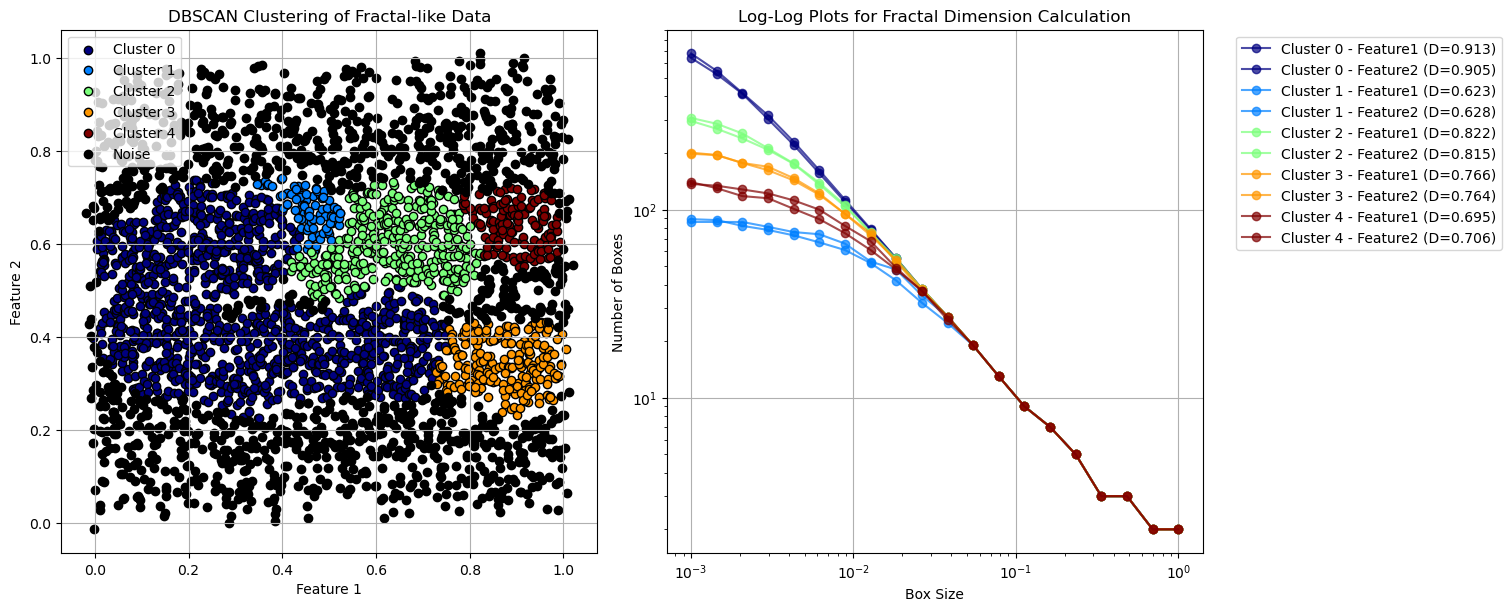


Fractal Dimensions Summary:
--------------------------------------------------
Original Data:
Feature1: 0.940
Feature2: 0.935

Clustered Data:
Cluster 0:
  Feature1: 0.913
  Feature2: 0.905
Cluster 1:
  Feature1: 0.623
  Feature2: 0.628
Cluster 2:
  Feature1: 0.822
  Feature2: 0.815
Cluster 3:
  Feature1: 0.766
  Feature2: 0.764
Cluster 4:
  Feature1: 0.695
  Feature2: 0.706


In [ ]:
# Generating the dataset/dataframe
n_samples = 3500 # Number of samples
df_fractal = generate_fractal_data(n_samples)

# Calculating the fractal dimensions for each feature
fractal_dimensions = {}
for column in df_fractal.columns:
    _, _, dim = box_count(df_fractal[column])
    fractal_dimensions[column] = dim

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df_fractal)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=100) # hyperparameters of DBSCAN machine
labels = dbscan.fit_predict(features_scaled)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 6), constrained_layout=True)
unique_labels = set(labels)
colors = plt.get_cmap('jet', len(unique_labels) - (1 if -1 in unique_labels else 0))
color_map = {}

# DBSCAN Clustering Plot
for i, label in enumerate(unique_labels):
    if label == -1:
        # Black used for noise.
        color = 'k'
        label_name = 'Noise'
    else:
        color = colors(i)
        label_name = f'Cluster {label}'
    
    color_map[label] = color  # Store color for each label
    # Plot the points for the current label
    axes[0].scatter(df_fractal['Feature1'][labels == label], df_fractal['Feature2'][labels == label],
                    color=color, edgecolor='black', label=label_name)

axes[0].set_title('DBSCAN Clustering of Fractal-like Data')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].legend()
axes[0].grid(True)

# Log-Log Plots for Each Cluster
for label in unique_labels:
    if label != -1:  # Ignore noise
        cluster_data = df_fractal[labels == label]
        results = calculate_fractal_dimensions(cluster_data)
        
        for column in cluster_data.columns:
            axes[1].loglog(results[column]['sizes'],
                           results[column]['counts'],
                           'o-',
                           color=color_map[label],  # Use stored color
                           label=f'Cluster {label} - {column} (D={results[column]["dimension"]:.3f})',
                           alpha=0.7)

axes[1].set_title('Log-Log Plots for Fractal Dimension Calculation')
axes[1].set_xlabel('Box Size')
axes[1].set_ylabel('Number of Boxes')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(True)

plt.show()

# Printing Fractal Dimensions
print("\nFractal Dimensions Summary:")
print("-" * 50)
print("Original Data:")
for column, dim in fractal_dimensions.items():
    print(f"{column}: {dim:.3f}")

print("\nClustered Data:")
cluster_fractal_dimensions = {}
for label in unique_labels:
    if label != -1:  # Ignore noise
        cluster_data = df_fractal[labels == label]
        cluster_dim = {}
        for column in cluster_data.columns:
            _, _, dim = box_count(cluster_data[column])
            cluster_dim[column] = dim
        cluster_fractal_dimensions[label] = cluster_dim

for label, dims in cluster_fractal_dimensions.items():
    print(f"Cluster {label}:")
    for column, dim in dims.items():
        print(f"  {column}: {dim:.3f}")

The fractal dimensions of Feature 1 and Feature 2 in the original data are approximately 0.940 and 0.936, respectively. These values indicate the complexity and self-similarity of the data patterns generated using the Cantor set and Sierpinski triangle methods. A fractal dimension close to 1 suggests a pattern that is more line-like, with some degree of complexity and irregularity.

### Significance of Results:
- **Original Data**: The fractal dimensions of the original features reflect the inherent complexity of the Cantor set and Sierpinski triangle patterns. These dimensions provide a quantitative measure of how the data fills space, with values less than 1 indicating that the patterns are not fully space-filling.

- **Clustered Data**: The fractal dimensions of the clustered data are slightly lower than those of the original data. This reduction in fractal dimension within clusters suggests that the clustering process has identified regions of the data with less complexity or variability. Each cluster represents a subset of the data with distinct characteristics, and the fractal dimension provides insight into the complexity of these subsets. This is also a direct observation of how clustering methods, such as DBSCAN are dimensionality reduction techniques.

Overall, the fractal dimensions help in understanding the geometric complexity of the data and how it changes when partitioned into clusters. This information can be useful for identifying patterns and structures within the data that may not be immediately apparent through other means.

When analyzing two datasets with fractal nature, the correlation between them can provide insights into their structural similarities and differences. Fractal dimensions offer a quantitative measure of complexity and self-similarity, which can be used to compare datasets.

### Analyzing on Correlation among fractal dimensions between features and clusters:

1. **Complexity Comparison**: If two datasets have similar fractal dimensions, it suggests that they share a similar level of complexity and pattern formation. This can indicate a correlation in their structural properties, even if the datasets originate from different processes.

2. **Pattern Recognition**: Fractal dimensions can help identify whether the datasets exhibit similar scaling behaviors. A strong correlation in fractal dimensions across features may imply that the datasets respond similarly to changes in scale, reflecting analogous underlying processes.

3. **Cluster Analysis**: By clustering the datasets and analyzing the fractal dimensions of each cluster, we can determine if similar patterns emerge within subsets of the data. Consistent fractal dimensions across clusters in both datasets can indicate a deeper correlation in their internal structures.

Overall, the correlation of fractal dimensions between two datasets can reveal shared characteristics and provide a deeper understanding of their inherent complexities and relationships.

## Sensitivity on the DBSCAN hyperparameters 

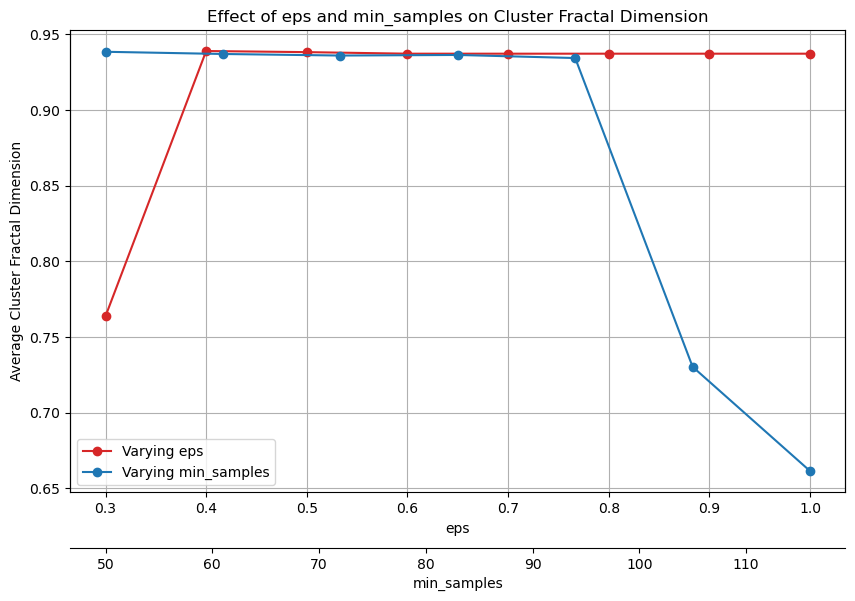

In [ ]:
# Building arrays for the range of eps and min_samples values to test
eps_values = np.linspace(0.1, 1.0, 10)
min_samples_values = np.linspace(50, 150, 10, dtype=int)

# We valuate the effect of varying eps
eps_results = []
fixed_min_samples = 100
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=fixed_min_samples)
    labels = dbscan.fit_predict(features_scaled)
    
    cluster_fractal_dimensions = []
    unique_labels = set(labels)
    for label in unique_labels:
        if label != -1:  # Ignore noise
            cluster_data = df_fractal[labels == label]
            results = calculate_fractal_dimensions(cluster_data)
            avg_dim = np.mean([results[col]['dimension'] for col in cluster_data.columns])
            cluster_fractal_dimensions.append(avg_dim)
    
    if cluster_fractal_dimensions:
        avg_fractal_dim = np.mean(cluster_fractal_dimensions)
        eps_results.append((eps, avg_fractal_dim))
    else:
        eps_results.append((eps, np.nan))

# Evaluate the effect of varying min_samples
min_samples_results = []
fixed_eps = 0.3
for min_samples in min_samples_values:
    dbscan = DBSCAN(eps=fixed_eps, min_samples=min_samples)
    labels = dbscan.fit_predict(features_scaled)
    
    cluster_fractal_dimensions = []
    unique_labels = set(labels)
    for label in unique_labels:
        if label != -1:  # Ignore noise
            cluster_data = df_fractal[labels == label]
            results = calculate_fractal_dimensions(cluster_data)
            avg_dim = np.mean([results[col]['dimension'] for col in cluster_data.columns])
            cluster_fractal_dimensions.append(avg_dim)
    
    if cluster_fractal_dimensions:
        avg_fractal_dim = np.mean(cluster_fractal_dimensions)
        min_samples_results.append((min_samples, avg_fractal_dim))
    else:
        min_samples_results.append((min_samples, np.nan))

# Converting results to DataFrames for plotting
eps_df = pd.DataFrame(eps_results, columns=['eps', 'avg_fractal_dim'])
min_samples_df = pd.DataFrame(min_samples_results, columns=['min_samples', 'avg_fractal_dim'])

# Plotting the results
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting for varying eps
ax1.plot(eps_df['eps'], eps_df['avg_fractal_dim'], marker='o', color='tab:red', label='Varying eps')
ax1.set_xlabel('eps')
ax1.set_ylabel('Average Cluster Fractal Dimension')
ax1.grid(True)

# Creating a second x-axis for min_samples
ax2 = ax1.twiny()
ax2.plot(min_samples_df['min_samples'], min_samples_df['avg_fractal_dim'], marker='o', color='tab:blue', label='Varying min_samples')
ax2.set_xlabel('min_samples')

# Adjusting the position of the second x-axis to be below the plot
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_label_position('bottom')
ax2.spines['bottom'].set_position(('outward', 40))
ax2.spines['top'].set_visible(False)

# Adding a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='lower left')

plt.title('Effect of eps and min_samples on Cluster Fractal Dimension')
plt.show()

### Now, I want to try the same for KMeans clustering!

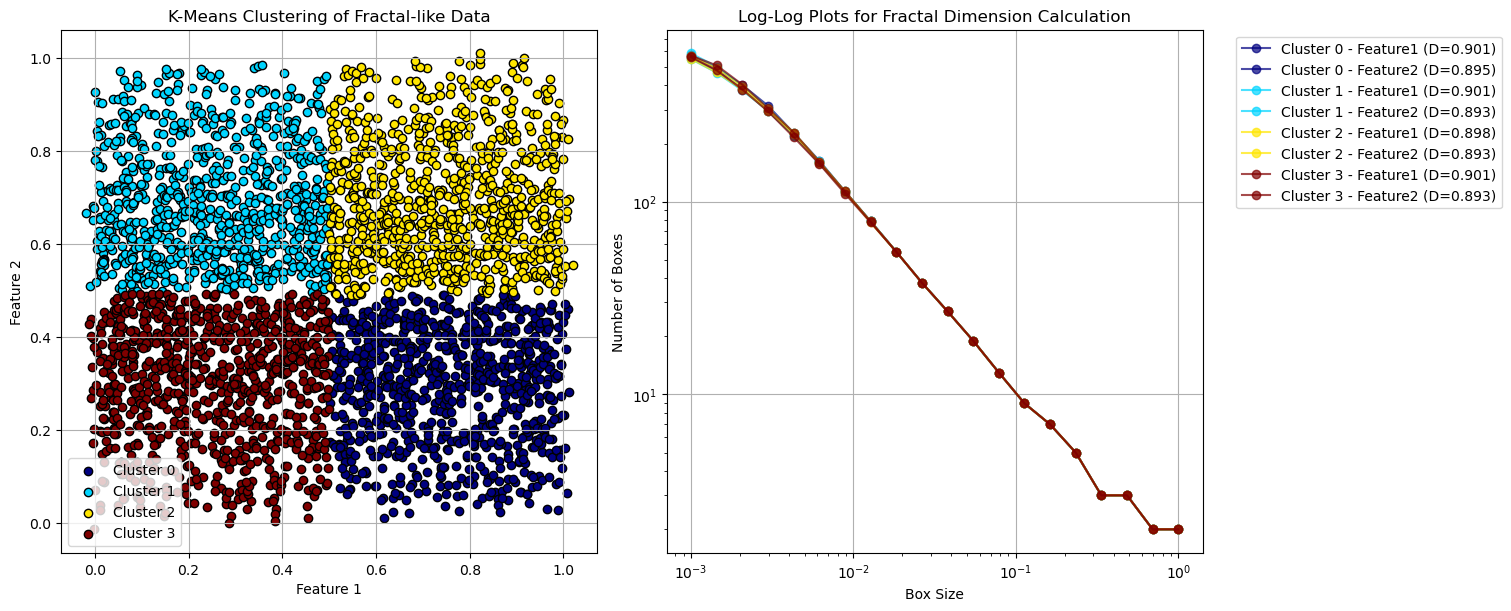


Fractal Dimensions Summary:
--------------------------------------------------
Original Data:
Feature1: 0.940
Feature2: 0.935

Clustered Data:
Cluster 0:
  Feature1: 0.901
  Feature2: 0.895
Cluster 1:
  Feature1: 0.901
  Feature2: 0.893
Cluster 2:
  Feature1: 0.898
  Feature2: 0.893
Cluster 3:
  Feature1: 0.901
  Feature2: 0.893


In [ ]:
# Applying K-Means
n_clusters = 4
n_init = 4
kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=42)
labels = kmeans.fit_predict(features_scaled)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 6), constrained_layout=True)
unique_labels = set(labels)
colors = plt.get_cmap('jet', len(unique_labels))
color_map = {}

# K-Means Clustering Plot
for i, label in enumerate(unique_labels):
    color = colors(i)
    label_name = f'Cluster {label}'
    color_map[label] = color  # storing color per label
    # Plotting the points for the current label
    axes[0].scatter(df_fractal['Feature1'][labels == label], df_fractal['Feature2'][labels == label],
                    color=color, edgecolor='black', label=label_name)

axes[0].set_title('K-Means Clustering of Fractal-like Data')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].legend()
axes[0].grid(True)

# Log-Log Plots for Each Cluster
for label in unique_labels:
    cluster_data = df_fractal[labels == label]
    results = calculate_fractal_dimensions(cluster_data)
    for column in cluster_data.columns:
        axes[1].loglog(results[column]['sizes'],
                       results[column]['counts'],
                       'o-',
                       color=color_map[label],  # Use stored color
                       label=f'Cluster {label} - {column} (D={results[column]["dimension"]:.3f})',
                       alpha=0.7)

axes[1].set_title('Log-Log Plots for Fractal Dimension Calculation')
axes[1].set_xlabel('Box Size')
axes[1].set_ylabel('Number of Boxes')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(True)

plt.show()

# Print Fractal Dimensions
print("\nFractal Dimensions Summary:")
print("-" * 50)
print("Original Data:")
for column, dim in fractal_dimensions.items():
    print(f"{column}: {dim:.3f}")

print("\nClustered Data:")
cluster_fractal_dimensions = {}
for label in unique_labels:
    cluster_data = df_fractal[labels == label]
    cluster_dim = {}
    for column in cluster_data.columns:
        _, _, dim = box_count(cluster_data[column])
        cluster_dim[column] = dim
    cluster_fractal_dimensions[label] = cluster_dim

for label, dims in cluster_fractal_dimensions.items():
    print(f"Cluster {label}:")
    for column, dim in dims.items():
        print(f"  {column}: {dim:.3f}")

The fractal dimension gets quite reduced!

### Main Conclusions
* This shows that when the data follows fractal patterns (self-similar, scaling), the fractal dimension gets even more reduced with clustering techniques, but not as substantially as to say the clusters are not-representative of the fractal properties, but just a bit less variant and complex.

* When comparing DBSCAN with Kmeans, we see it lowers the most the fractal dimension of the groups with respect to the original datasets. This is because the fractal dimension can be seen as a measure of the spread of the data (variance) and DBSCAN is very demanding when it comes to data interrelation, ignoring a lot/classifying many points as outliers or noise (more conservative). 

* The advantage of running Kmeans is that variance is reduced without losing interpretability but still the new clusters maintain representativity (more in comparison to DBSCAN) with respect to the original fractal properties.

* We can also use this code to understand the effect of different hyperparameters on the fractal dimension. Additionally, the box count plots show a higher change in slope at lower number of boxes size, when the fractal dimension is the most disturbed/changed/altered, making datasets potentially lose self-similarity character.

* So working with fractals and coupling their fractal dimension as a control parameter to understand the effect on variance (or degrees of freedom) of different self-similar clusters is a win win, because there is still interpretability while reducing the dimensionality. It can also be used as a sampling technique, similar to bootstrapping.

* The advantage of using Fractal Dimension is that we can extrapolate and interpolate data, which can be used as well for feature imputation! Fractals can help all the way in Machine Learning!

### References
- Cantor, G. (1883). *Über unendliche, lineare Punktmannigfaltigkeiten*. Mathematische Annalen.
- Falconer, K. J. (1990). *Fractal Geometry: Mathematical Foundations and Applications*. John Wiley & Sons.
- Mandelbrot, B. B. (1982). *The Fractal Geometry of Nature*. W. H. Freeman and Company.
- Sierpiński, W. (1915). *Sur une courbe dont tout point est un point de ramification*. Comptes Rendus de l'Académie des Sciences de Paris.
- Traina, C., Traina, A., Wu, L., Faloutsos, C. *Fast Feature Selection using Fractal Dimension*. Journal of Information and Data Management, Vol. 1, No. 1, February 2010, Pages 3–16.

#### About the Supervising Professor

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)